In [212]:
# import needed lybraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression

In [213]:
# load the datasets
car = pd.read_csv('quikr_car.csv')

In [214]:
# check the head 
car.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


In [215]:
#check the data shape which are the roles and columns
car.shape

(892, 6)

In [216]:
# check the data info
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


In [217]:
# checking for strings in the feature 'year' which is an int
car.year.unique()

array(['2007', '2006', '2018', '2014', '2015', '2012', '2013', '2016',
       '2010', '2017', '2008', '2011', '2019', '2009', '2005', '2000',
       '...', '150k', 'TOUR', '2003', 'r 15', '2004', 'Zest', '/-Rs',
       'sale', '1995', 'ara)', '2002', 'SELL', '2001', 'tion', 'odel',
       '2 bs', 'arry', 'Eon', 'o...', 'ture', 'emi', 'car', 'able', 'no.',
       'd...', 'SALE', 'digo', 'sell', 'd Ex', 'n...', 'e...', 'D...',
       ', Ac', 'go .', 'k...', 'o c4', 'zire', 'cent', 'Sumo', 'cab',
       't xe', 'EV2', 'r...', 'zest'], dtype=object)

In [218]:
# checking for strings in a feature 'Prices' that is an int
car.Price.unique()

array(['80,000', '4,25,000', 'Ask For Price', '3,25,000', '5,75,000',
       '1,75,000', '1,90,000', '8,30,000', '2,50,000', '1,82,000',
       '3,15,000', '4,15,000', '3,20,000', '10,00,000', '5,00,000',
       '3,50,000', '1,60,000', '3,10,000', '75,000', '1,00,000',
       '2,90,000', '95,000', '1,80,000', '3,85,000', '1,05,000',
       '6,50,000', '6,89,999', '4,48,000', '5,49,000', '5,01,000',
       '4,89,999', '2,80,000', '3,49,999', '2,84,999', '3,45,000',
       '4,99,999', '2,35,000', '2,49,999', '14,75,000', '3,95,000',
       '2,20,000', '1,70,000', '85,000', '2,00,000', '5,70,000',
       '1,10,000', '4,48,999', '18,91,111', '1,59,500', '3,44,999',
       '4,49,999', '8,65,000', '6,99,000', '3,75,000', '2,24,999',
       '12,00,000', '1,95,000', '3,51,000', '2,40,000', '90,000',
       '1,55,000', '6,00,000', '1,89,500', '2,10,000', '3,90,000',
       '1,35,000', '16,00,000', '7,01,000', '2,65,000', '5,25,000',
       '3,72,000', '6,35,000', '5,50,000', '4,85,000', '3,29,5

In [219]:
# Retrieve the unique values in the 'kms_driven' column of the 'car' DataFrame
car['kms_driven'].unique()

array(['45,000 kms', '40 kms', '22,000 kms', '28,000 kms', '36,000 kms',
       '59,000 kms', '41,000 kms', '25,000 kms', '24,530 kms',
       '60,000 kms', '30,000 kms', '32,000 kms', '48,660 kms',
       '4,000 kms', '16,934 kms', '43,000 kms', '35,550 kms',
       '39,522 kms', '39,000 kms', '55,000 kms', '72,000 kms',
       '15,975 kms', '70,000 kms', '23,452 kms', '35,522 kms',
       '48,508 kms', '15,487 kms', '82,000 kms', '20,000 kms',
       '68,000 kms', '38,000 kms', '27,000 kms', '33,000 kms',
       '46,000 kms', '16,000 kms', '47,000 kms', '35,000 kms',
       '30,874 kms', '15,000 kms', '29,685 kms', '1,30,000 kms',
       '19,000 kms', nan, '54,000 kms', '13,000 kms', '38,200 kms',
       '50,000 kms', '13,500 kms', '3,600 kms', '45,863 kms',
       '60,500 kms', '12,500 kms', '18,000 kms', '13,349 kms',
       '29,000 kms', '44,000 kms', '42,000 kms', '14,000 kms',
       '49,000 kms', '36,200 kms', '51,000 kms', '1,04,000 kms',
       '33,333 kms', '33,600 kms', '5,

In [220]:
# checking for strings in a feature 'fuel_type' that is an int
car['fuel_type'].unique()

array(['Petrol', 'Diesel', nan, 'LPG'], dtype=object)

##  Quality

- year has many non-year values
- year object to int
- Price has ask for Price 
- Price object to int 
- kms_driven has kms with integers
- kms_dreben has nan values
- fuel type has nan values
- keep first 3 words of name 


In [221]:
# Display the sum of null (missing) values in each column of the 'car'
car.isnull().sum()

name           0
company        0
year           0
Price          0
kms_driven    52
fuel_type     55
dtype: int64

In [222]:
# import seaborn
import seaborn as sns

C:\Users\HP-PC\AppData\Local\Temp\ipykernel_12640\329128044.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')


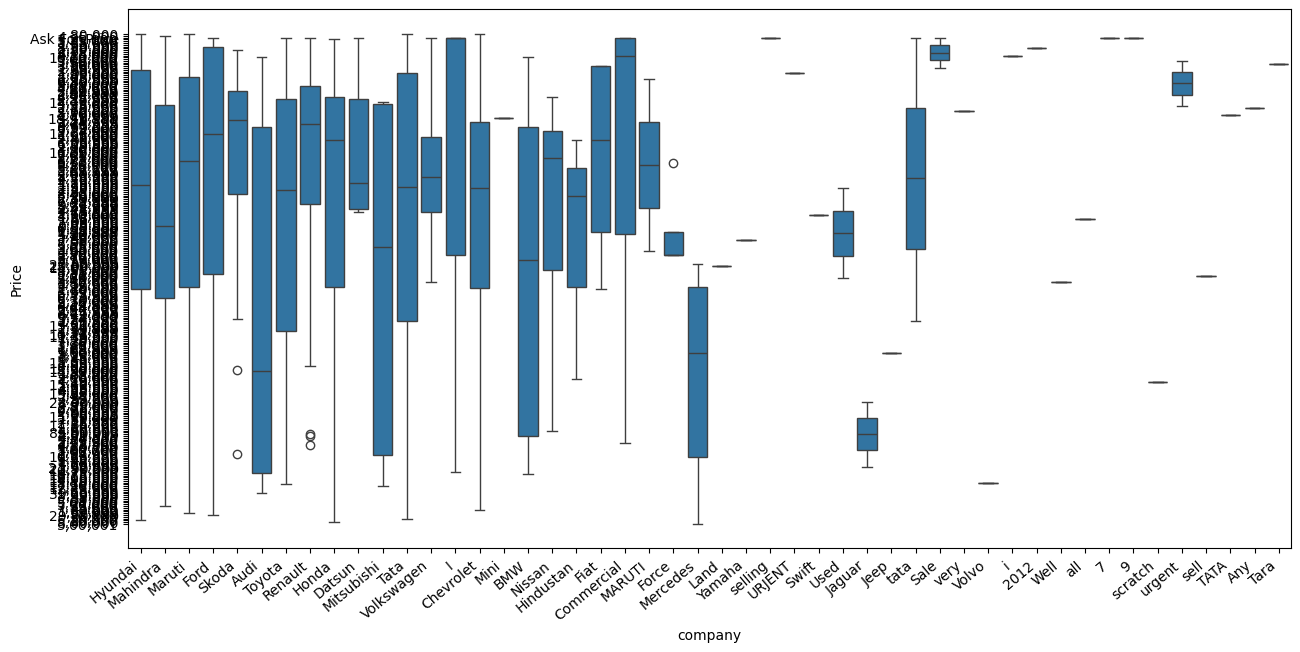

In [226]:
# Set the size of the plot figure
plt.subplots(figsize=(15,7))
# Create a boxplot using Seaborn

# x-axis: 'company', y-axis: 'Price', data source: 'car'
ax=sns.boxplot(x='company',y='Price',data=car)
# Rotate the x-axis labels for better visibility
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
# Display the plot
plt.show()

# Cleaning

In [227]:
# creating a duplicate for our dataset
backup = car.copy()

In [228]:
# Filter rows in the 'car' DataFrame where the 'year' column contains only numeric values 
car= car[car['year'].str.isnumeric()]

In [229]:
# Convert the 'year' column in the 'car' DataFrame to integer type
# This assumes that the 'year' column originally contains numeric representations as strings
car['year']=car['year'].astype(int)

In [230]:

# Filter rows in the 'car' DataFrame where the 'Price' column is not equal to "Ask For Price"
car= car[car['Price']!= "Ask For Price"]

In [231]:
# Remove commas from the 'Price' column in the 'car' DataFrame
car['Price'] = car['Price'].str.replace(',', '')

# Convert the 'Price' column to integer type
car['Price'] = car['Price'].astype(int)

In [232]:
# Display summary information about the car
car.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 819 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        819 non-null    object
 1   company     819 non-null    object
 2   year        819 non-null    int32 
 3   Price       819 non-null    int32 
 4   kms_driven  819 non-null    object
 5   fuel_type   816 non-null    object
dtypes: int32(2), object(4)
memory usage: 38.4+ KB


In [233]:
# Extract numeric part from 'kms_driven' column by splitting on spaces and taking the first part
# Remove commas from the extracted values to convert them to numeric format
car['kms_driven']=car['kms_driven'].str.split(' ').str.get(0).str.replace(',','')

In [234]:
# Filter rows in the 'car' DataFrame where the 'kms_driven' column contains only numeric values
car=car[car['kms_driven'].str.isnumeric()]

In [235]:
# Convert the 'kms_driven' column in the 'car' DataFrame to integer type
car['kms_driven']=car['kms_driven'].astype(int)

In [236]:
car.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 817 entries, 0 to 889
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        817 non-null    object
 1   company     817 non-null    object
 2   year        817 non-null    int32 
 3   Price       817 non-null    int32 
 4   kms_driven  817 non-null    int32 
 5   fuel_type   816 non-null    object
dtypes: int32(3), object(3)
memory usage: 35.1+ KB


In [237]:
# Filter rows in the 'car' DataFrame where the 'fuel_type' column is not null
car =car[~car['fuel_type'].isna()]

In [238]:
# Split the 'name' column in the 'car' DataFrame based on spaces
# Extract the first three parts (words) from each split value
# Join the extracted parts back together with spaces to form modified names
car['name']=car['name'].str.split(' ').str.slice(0,3).str.join(' ')

In [239]:
# Reset the index of the 'car' DataFrame and drop the existing index column
# Setting drop=True ensures the old index column is not retained in the DataFrame
car=car.reset_index(drop=True)

In [240]:
car

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
4,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
811,Maruti Suzuki Ritz,Maruti,2011,270000,50000,Petrol
812,Tata Indica V2,Tata,2009,110000,30000,Diesel
813,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
814,Tata Zest XM,Tata,2018,260000,27000,Diesel


In [241]:
car.describe()

,year,Price,kms_driven
count,816.000000,8.160000e+02,816.000000
mean,2012.444853,4.117176e+05,46275.531863
std,4.002992,4.751844e+05,34297.428044
min,1995.000000,3.000000e+04,0.000000
25%,2010.000000,1.750000e+05,27000.000000
50%,2013.000000,2.999990e+05,41000.000000
75%,2015.000000,4.912500e+05,56818.500000
max,2019.000000,8.500003e+06,400000.000000


In [242]:
# Filter rows in the 'car' DataFrame where the 'Price' column is less than 6e6 (6 million)
# Reset the index of the resulting DataFrame and drop the existing index column
car =car[car['Price']<6e6].reset_index(drop=True)

In [243]:
car

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
4,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
810,Maruti Suzuki Ritz,Maruti,2011,270000,50000,Petrol
811,Tata Indica V2,Tata,2009,110000,30000,Diesel
812,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
813,Tata Zest XM,Tata,2018,260000,27000,Diesel


In [244]:
# Save the cleaned 'car' DataFrame to a CSV file named 'Cleaned_Car.csv'
car.to_csv('Cleand_Car.csv')

# Model

In [245]:
# Create feature matrix X by dropping the 'Price' column from the 'car' DataFrame
X= car.drop(columns ='Price')


# Create target variable y by selecting only the 'Price' column from the 'car' DataFrame
y= car['Price']

# Applying Train Test Split

In [246]:
# Import the train_test_split function from sklearn.model_selection
from sklearn.model_selection import train_test_split

# Split the feature matrix X and target variable y into training and testing sets
# The test_size parameter is set to 0.2, indicating an 80-20 split with 80% for training and 20% for testing
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [247]:
# Import the r2_score function from sklearn.metrics
from sklearn.metrics import r2_score

# Import necessary modules for data preprocessing and feature engineering
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

# Creating an OneHotEncoder object to contain all the possible categories

In [248]:
# Create an instance of the OneHotEncoder
ohe=OneHotEncoder()

# Fit the OneHotEncoder on selected categorical columns ('name', 'company', 'fuel_type') in the feature matrix X
ohe.fit(X[['name','company','fuel_type']])

OneHotEncoder()

In [249]:
# Create a column transformer using make_column_transformer
# Apply OneHotEncoder to specified categorical columns ('name', 'company', 'fuel_type')
# 'categories=ohe.categories_' ensures consistent encoding across train and test data
# 'remainder='passthrough'' includes non-categorical columns as-is
column_trans=make_column_transformer((OneHotEncoder(categories=ohe.categories_),['name','company','fuel_type']),
                                    remainder='passthrough')

In [250]:
# Create an instance of the Linear Regression model
lr = LinearRegression()

In [251]:
# Create a pipeline using make_pipeline
# The pipeline includes the column transformer 'column_trans' and the Linear Regression model 'lr'
pipe=make_pipeline(column_trans,lr)

In [252]:
# Fit the pipeline to the training data
# This involves applying the column transformations and training the Linear Regression model
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
       'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
       'BMW 5 Series', 'BMW 7 Series', 'BMW X1', 'BMW X1 sDrive20d',
       'BMW X1 xDrive20d', 'Chevrolet Beat', 'Chevrolet Beat...
                                                                            array(['Audi', 'BMW', 'Chevrolet', 'Datsun', 'Fiat', 'Force', 'Ford',
       'Hindustan', 'Honda', 'Hyundai', 'Jaguar', 'Jeep', 'Land',
       'Mahindra', 'Maruti', 'Mercedes', 'Mini', 'Mitsubishi', 'Nissan',
       'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen', 'Volvo'],
      dtype=object),
                                                                            array(['Diesel', 'LPG', 'Petrol'], dtype=object)]),
                                                  ['name', 'company',
                                                   'fuel_type'])])),
                ('linearregression', LinearRegression())])

In [253]:
# Use the trained pipeline to make predictions on the test data
y_pred=pipe.predict(X_test)

In [254]:
# Calculate the R-squared score to evaluate the model's performance on the test data

r2_score(y_test,y_pred)

0.7075111928215642

# Finding the model with a random state of TrainTestSplit where the model was found to give almost 0.92 as r2_score

In [255]:
# Perform 1000 iterations of train-test splitting, model training, and evaluation
scores = []

for i in range(1000):
    # Split the data into training and testing sets with a fixed random state for reproducibility
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=i)
    
    # Create a Linear Regression model and a pipeline with the specified transformations
    lr = LinearRegression()
    pipe = make_pipeline(column_trans, lr)
    
    # Fit the pipeline to the training data and make predictions on the test data
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    
    # Evaluate the model's performance using R-squared and store the result in the 'scores' list
    scores.append(r2_score(y_test, y_pred))

In [256]:
# Find the index corresponding to the highest R-squared score in the 'scores' list
np.argmax(scores)

302

In [257]:
# Retrieve the highest R-squared score from the 'scores' list using the index with the maximum score
scores[np.argmax(scores)]

0.8991157554877304

In [258]:
# Split the data into training and testing sets using the random state corresponding to the best-performing iteration
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=np.argmax(scores))

# Create a Linear Regression model and a pipeline with the specified transformations
lr = LinearRegression()
pipe = make_pipeline(column_trans, lr)

# Fit the pipeline to the training data and make predictions on the test data
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

# Evaluate the model's performance on the test data using R-squared
r2 = r2_score(y_test, y_pred)
print(r2)


0.8991157554877304


In [259]:
# Import the 'pickle' module for serializing and deserializing Python objects
import pickle

In [260]:
# Serialize and save the trained pipeline ('pipe') using pickle
# The model is saved to a file named 'LinearRegressionModel.pkl' in binary write mode ('wb')
pickle.dump(pipe, open('LinearRegressionModel.pkl', 'wb'))

In [261]:
# Use the trained pipeline ('pipe') to make predictions on a new input data
# The input data is provided as a Pandas DataFrame with specific column names
# The resulting prediction represents the estimated 'Price' for the given input
pipe.predict(pd.DataFrame([['Maruti Suzuki Swift', 'Maruti', 2019, 100, 'Petrol']], columns=['name', 'company', 'year', 'kms_driven', 'fuel_type']))


array([456670.3272301])